In [2]:
#Import libraries
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
import missingno as msno
from fancyimpute import KNN, IterativeImputer
import seaborn as sns

C:\Users\joshu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Load datasets
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")
SampleSubmit = pd.read_csv("SampleSubmission.csv")
VarDef = pd.read_csv("VariableDefinitions.csv")
riders = pd.read_csv("Riders.csv")

In [3]:
train.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [5]:
test.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


In [6]:
riders.head()

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


In [7]:
#Training data including rider information
mergedtrain = pd.merge(train, riders, how = "left", on = 'Rider Id')

## Exploration

In [18]:
train.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [13]:
train.dtypes

Order No                                      object
User Id                                       object
Vehicle Type                                  object
Platform Type                                  int64
Personal or Business                          object
Placement - Day of Month                       int64
Placement - Weekday (Mo = 1)                   int64
Placement - Time                              object
Confirmation - Day of Month                    int64
Confirmation - Weekday (Mo = 1)                int64
Confirmation - Time                           object
Arrival at Pickup - Day of Month               int64
Arrival at Pickup - Weekday (Mo = 1)           int64
Arrival at Pickup - Time                      object
Pickup - Day of Month                          int64
Pickup - Weekday (Mo = 1)                      int64
Pickup - Time                                 object
Arrival at Destination - Day of Month          int64
Arrival at Destination - Weekday (Mo = 1)     

In [4]:
useless = ["Order No", "User Id", "Vehicle Type", "Placement - Day of Month", "Placement - Weekday (Mo = 1)", 
           "Placement - Time", 'Confirmation - Day of Month','Confirmation - Weekday (Mo = 1)', 'Confirmation - Time',
           'Arrival at Pickup - Day of Month', 'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
           'Pickup - Day of Month', 'Arrival at Destination - Day of Month', 'Arrival at Destination - Weekday (Mo = 1)', 
           'Arrival at Destination - Time', 'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long', 'Destination Lat',
             'Destination Long'
           ]

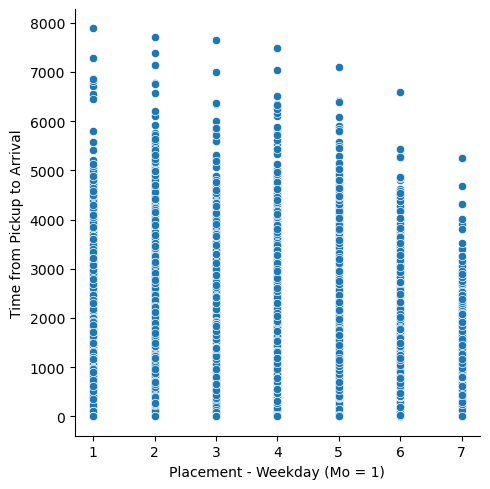

In [16]:
sns.relplot(data=train, x="Placement - Weekday (Mo = 1)",y="Time from Pickup to Arrival")

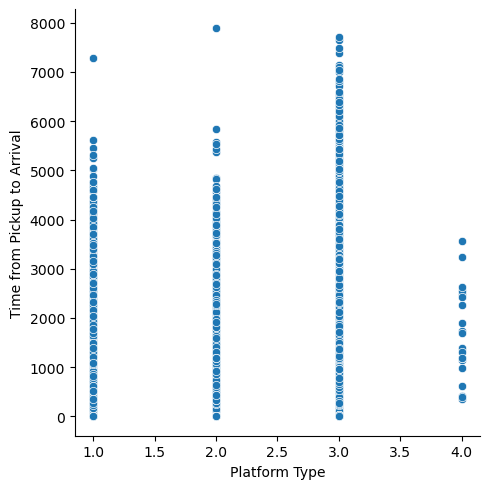

In [19]:
sns.relplot(data=train, x="Platform Type",y="Time from Pickup to Arrival")

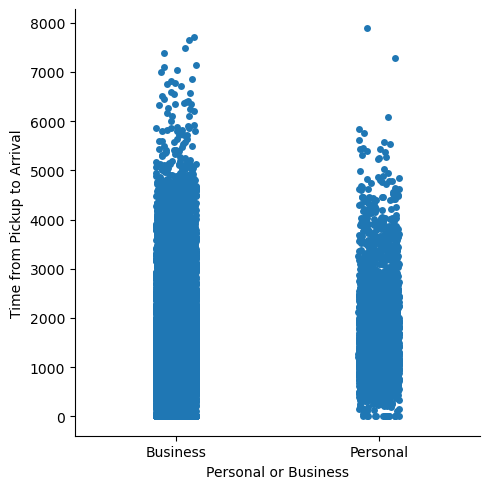

In [21]:
sns.catplot(data=train, x="Personal or Business",y="Time from Pickup to Arrival")

In [ ]:
##Do some pairplots
sns.relplot(data=mergedtrain, x="Average_Rating", y="Time from Pickup to Arrival")

In [4]:
clean = pd.read_pickle('clean_training')

In [6]:
clean.head()

,Rider_id,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Platform_type,is_business,Pickup_weekday,Pickup_time,Distance,Temperature,Travel_time
0,Rider_Id_432,1637,1309,13.8,549,3,True,5,10:27:30 AM,4,20.400000,745
1,Rider_Id_856,396,339,13.6,69,3,False,5,11:44:09 AM,16,26.400000,1993
2,Rider_Id_155,1023,242,12.5,114,3,True,2,12:53:03 PM,3,23.258889,455
3,Rider_Id_855,886,283,14.5,113,3,True,5,9:43:06 AM,9,19.200000,1341
4,Rider_Id_770,2311,872,14.1,533,1,False,1,10:05:23 AM,9,15.400000,1214


In [8]:
#convert time to seconds since midnight
def settime(time):
    split = time.split(':')
    tempsplit = split[2].split(' ')
    if int(split[0]) != 12:
        seconds = int(split[0])*3600 + int(split[1])*60 + int(tempsplit[0])
    elif tempsplit[1] == 'PM' and int(split[0]) == 12:
        seconds = int(split[0])*3600 + int(split[1])*60 + int(tempsplit[0])
    else:
        seconds = int(split[1])*60 + int(tempsplit[0])
    if tempsplit[1] == 'PM' and int(split[0]) != 12:
        seconds += 43200
    return seconds

<Axes: xlabel='Pickup_time', ylabel='Travel_time'>

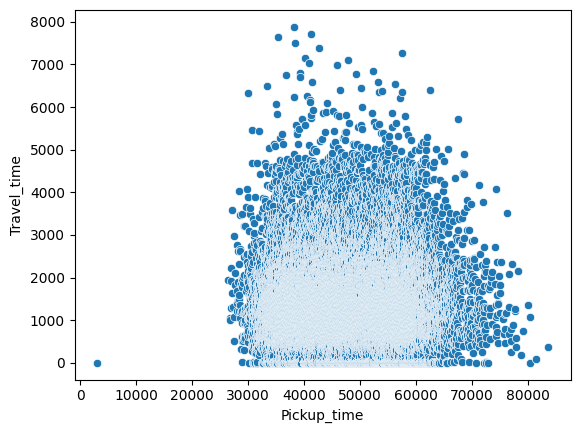

In [9]:

clean['Pickup_time'] = clean["Pickup_time"].apply(settime)

sns.scatterplot(data = clean.sort_values(by = 'Pickup_time'), x = "Pickup_time", y = "Travel_time")

## Cleaning

In [9]:
train.isnull().sum()

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

In [11]:
train.isnull().sum()  /  train.shape[0]

Order No                                     0.000000
User Id                                      0.000000
Vehicle Type                                 0.000000
Platform Type                                0.000000
Personal or Business                         0.000000
Placement - Day of Month                     0.000000
Placement - Weekday (Mo = 1)                 0.000000
Placement - Time                             0.000000
Confirmation - Day of Month                  0.000000
Confirmation - Weekday (Mo = 1)              0.000000
Confirmation - Time                          0.000000
Arrival at Pickup - Day of Month             0.000000
Arrival at Pickup - Weekday (Mo = 1)         0.000000
Arrival at Pickup - Time                     0.000000
Pickup - Day of Month                        0.000000
Pickup - Weekday (Mo = 1)                    0.000000
Pickup - Time                                0.000000
Arrival at Destination - Day of Month        0.000000
Arrival at Destination - Wee

In [11]:
#Precipitation is mostly empty, so we drop it
mergedtrain = mergedtrain.drop(columns=useless)

In [14]:
mergedtrain.head()

,Platform Type,Personal or Business,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Rider Id,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,3,Business,5,10:27:30 AM,4,20.4,Rider_Id_432,745,1637,1309,13.8,549
1,3,Personal,5,11:44:09 AM,16,26.4,Rider_Id_856,1993,396,339,13.6,69
2,3,Business,2,12:53:03 PM,3,NaN,Rider_Id_155,455,1023,242,12.5,114
3,3,Business,5,9:43:06 AM,9,19.2,Rider_Id_855,1341,886,283,14.5,113
4,1,Personal,1,10:05:23 AM,9,15.4,Rider_Id_770,1214,2311,872,14.1,533


In [12]:
mergedtrain.dtypes

Platform Type                    int64
Personal or Business            object
Pickup - Weekday (Mo = 1)        int64
Pickup - Time                   object
Distance (KM)                    int64
Temperature                    float64
Rider Id                        object
Time from Pickup to Arrival      int64
No_Of_Orders                     int64
Age                              int64
Average_Rating                 float64
No_of_Ratings                    int64
dtype: object

In [15]:
mergedtrain = mergedtrain.reindex(columns=["Rider Id", "No_Of_Orders", 'Age',"Average_Rating","No_of_Ratings", "Platform Type",
                                           "Personal or Business","Pickup - Weekday (Mo = 1)",
                                           "Pickup - Time","Distance (KM)","Temperature","Time from Pickup to Arrival"])

In [16]:
mergedtrain.head()

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Platform Type,Personal or Business,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Time from Pickup to Arrival
0,Rider_Id_432,1637,1309,13.8,549,3,Business,5,10:27:30 AM,4,20.4,745
1,Rider_Id_856,396,339,13.6,69,3,Personal,5,11:44:09 AM,16,26.4,1993
2,Rider_Id_155,1023,242,12.5,114,3,Business,2,12:53:03 PM,3,NaN,455
3,Rider_Id_855,886,283,14.5,113,3,Business,5,9:43:06 AM,9,19.2,1341
4,Rider_Id_770,2311,872,14.1,533,1,Personal,1,10:05:23 AM,9,15.4,1214


In [17]:
impute = mergedtrain["Temperature"]